In [1]:
#This program is written in python 3.5.1
#What is yours?!

import sys
sys.version

'3.5.1 (v3.5.1:37a07cee5969, Dec  5 2015, 21:12:44) \n[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]'

In [2]:
#path="/Users/mgorjise/Desktop/new/CMU/New.xlsx"
path="/Users/mgorjise/Documents/new/reading/CMU/New.xlsx"
import pandas as pd
xl = pd.ExcelFile(path,sep='\s*,\s*',encoding='ascii')
xl.sheet_names

['Sheet1']

In [4]:
df = xl.parse('Sheet1')
df.head()

,Full element name,Executable model variable name,Element values,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,NaN,NaN,Sc. 1 Begin,Sc. 1 End,Sc. 1 Sim End,Sc. 2 Begin,Sc. 2 End,Sc. 2 Sim End,Sc. 3 Begin,Sc. 3 End,...,NaN,References for Influence set,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Disintegrin and metalloproteinase domain-conta...,ADAM17,0,1,0,2,1,2,1,0,...,NaN,PMID24096196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RAC-alpha serine/threonine-protein kinase (Akt),AKT1,0,1,2,1,2,0,2,2,...,NaN,PMC3128635,PMC4295631 index card,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5' AMP-activated protein kinase (AMPK),AMPK,0,1,0,1,2,1,2,2,...,NaN,PMC3454471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Full element name', 'Executable model variable name', 'Element values',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Importance of element',
       'Graph model variable name', 'Unique ID', 'Unique ID (text)',
       'Element kind', 'Element type', 'Element sub-type',
       'Spontaneously Restores (R) Degrades (D)',
       'Type of value: Activity (A) Amount (C) Process (P)', 'Location',
       'Model   Input (I) Output (O)', 'initial value', 'Unnamed: 23',
       'No. of reg.', 'Interaction', 'Unnamed: 26', 'Influence set',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39'],
      dtype='object')

In [6]:
# Create a list of participant in this dictionary form: (graph name: unique id )


ListOfParticipant=[]
ListOfLocation=[]
ListOfUniqueid=[]
ElementType=[]
ListOfInfluence_positive=[]
ListOfInfluence_negative=[]
ParticipantsDict={}
ListOfEvents=[]

def isNaN(num):
    return num != num


import math
import re
nan=float("nan")

for i in range(2,171):
    
    name=df['Graph model variable name'][i].replace(' ','')
    ListOfParticipant.append(name)
    
    #ListOfLocation.append(df['Location'][i])
    
    
    ID=df['Unique ID'][i]
   
    if (':' in ID) == False:
        ID='uniprot:'+ID
    ParticipantsDict.update({name:ID})
    ListOfUniqueid.append(ID)
    
    #ElementType.append(df['Element type'][i])
    
    IP=df['Influence set'][i]  #Influence_positive
    if type(IP)==str:
        IP=IP.replace(';',' ').replace(',',' ').replace('or',' ').replace('and',' ').replace('{',' ').replace('}',' ').replace('[',' ').replace(']',' ').replace('(',' ').replace(')',' ').split()
        ListOfInfluence_positive.append(IP)
        
    IN=df['Unnamed: 28'][i]    #Influence_negative
    if type(IN)==str:
        IN=IN.replace(';',' ').replace(',',' ').replace('or',' ').replace('and',' ').replace('{',' ').replace('}',' ').replace('[',' ').replace(']',' ').replace('(',' ').replace(')',' ').split()
        ListOfInfluence_negative.append(IN)
        
    ET=df['Unnamed: 26'][i]  #Event Type
    ET=str(ET).replace(',',' ').split()
    
    if not isNaN(IP):
        for j in range(0,len(IP)):      
            ListOfEvents.append((IP[j],name,'Positive',ET))
            
    if not isNaN(IN): 
        for j in range(0,len(IN)):
            ListOfEvents.append((IN[j],name,'Negative',ET))
    
 
   #k=0
    #if not isNaN(IP):
        #for j in range(0,len(IP)):
            #if ET[0]=='nan': 
                #ET1='nan' 
            #else:
                #ET1=ET[k]
                
            #ListOfEvents.append((IP[j],name,'Positive',ET1))
            #k=k+1
    #if not isNaN(IN):
        #for j in range(0,len(IN)):
            #if ET[0]=='nan': 
                #ET1='nan' 
            #else:
                #ET1=ET[k]
                
            #ListOfEvents.append((IN[j],name,'Negative',ET1))
            #k=k+1

### Now we have a list of tuples, each tuple contains the cause, effect, sign of event (positive/negative) and event type

In [77]:
ListOfEvents

[('PKCa', 'ADAM17', 'Positive', ['nan']),
 ('PDPK1', 'AKT1', 'Positive', ['nan']),
 ('ICMT', 'AKT1', 'Negative', ['nan']),
 ('LKB1', 'AMPK', 'Positive', ['nan']),
 ('Fos', 'AP1', 'Positive', ['?', 'binding', 'phosphorylation']),
 ('JNK1nuc', 'AP1', 'Positive', ['?', 'binding', 'phosphorylation']),
 ('Ref1nuc', 'AP1', 'Positive', ['?', 'binding', 'phosphorylation']),
 ('Nrf2nuc', 'ARE', 'Positive', ['nan']),
 ('Bach1', 'ARE', 'Negative', ['nan']),
 ('Thi', 'ASK', 'Positive', ['nan']),
 ('edoxin', 'ASK', 'Positive', ['nan']),
 ('TRAFcyto', 'ASK', 'Positive', ['nan']),
 ('ROS', 'ATG4A', 'Negative', ['nan']),
 ('ROS', 'ATM', 'Positive', ['nan']),
 ('ATMcyto', 'ATM', 'Positive', ['translocation', '?', '?']),
 ('MRN', 'ATM', 'Positive', ['translocation', '?', '?']),
 ('PP2A', 'ATM', 'Negative', ['translocation', '?', '?']),
 ('OXPHOS', 'ATP', 'Positive', ['nan']),
 ('ROS', 'Bach1', 'Negative', ['nan']),
 ('NFkBcyto', 'BclXL', 'Positive', ['nan']),
 ('STAT1cyto', 'BclXL', 'Positive', ['nan'])

### Also, we are creating a dictionary that map each name to its unique Id. We have read the columns ('Graph model variable name' and 'Unique ID' ) from excel file. Also, for making the dictionary complete, we read also from NMZ-CMU_160111.tsv

In [8]:
import csv
#path="/Users/mgorjise/Desktop/new/CMU/NMZ-CMU_160111.tsv"
path="/Users/mgorjise/Documents/new/reading/CMU/NMZ-CMU_160111.tsv"

with open(path, encoding='ISO-8859-1') as tsvin:
    next(tsvin, None)
    next(tsvin, None)
    next(tsvin, None)
    for line in csv.reader(tsvin, dialect="excel", delimiter='\t',skipinitialspace=True):
        ParticipantsDict.update({line[0]:line[1]+':'+line[2]})
ParticipantsDict.update({"ROS":"chemidplus:D017382000"})


Error: line contains NULL byte

### this is the dictionary created:

In [9]:
ParticipantsDict

{'ADAM17': 'uniprot:P78536',
 'AKT1': 'uniprot:P31749',
 'AMPK': 'uniprot:Q13131',
 'AP1': 'uniprot:P05412',
 'ARE': 'uniprot:ARE',
 'ASK': 'uniprot:Q9UBU7',
 'ATG4A': 'uniprot:Q8WYN0',
 'ATM': 'uniprot:Q13315',
 'ATP': 'hmdb:HMDB00538',
 'AcidicME': 'uniprot:AcidicME',
 'Apoptosis': 'go:0006915',
 'Autophagy': 'go:0006914',
 'Bach1': 'uniprot:O14867',
 'BclXL': 'uniprot:Q07817',
 'CD122': 'uniprot:P14784',
 'CD132': 'uniprot:P31785',
 'CD25': 'uniprot:P01589',
 'CD28': 'uniprot:P10747',
 'CDN2A': 'uniprot:P42771',
 'Ca': 'hmdb:HMDB00464',
 'Cas8': 'uniprot:Q14790',
 'CellCellCon': 'go:0044291',
 'CellDeath': 'go:0008219',
 'CellSurvival': 'go:15680329',
 'Chk2': 'uniprot:O96017',
 'DNAdsb': 'go:1990166',
 'DRsyn': 'go:0090592',
 'DUSP13': 'uniprot:Q9UII6',
 'E2F': 'uniprot:Q01094',
 'EGF': 'uniprot:P01133',
 'EGFR': 'uniprot:P00533',
 'ERK1': 'uniprot:P27361',
 'ExoCx': 'uniprot:Q9NV70',
 'Exosomes': 'GO:0070062',
 'FGF1': 'uniprot:P05230',
 'FGFR1': 'uniprot:P11362',
 'FOXP3': 'unipr

### However, as it can be seen, all of the influencers are not in our dictionary. it means that there are many influencers in  Excel files that we cannot find unique id for them.

In [10]:
k=0
newlist=ListOfInfluence_negative+ListOfInfluence_positive
for i in range(0,len(newlist)):
    a=ParticipantsDict.get(newlist[i][0])
    if a==None:
        k=k+1
        #print(newlist[i][0])
print(k,'out of ', len(newlist), 'influencers dont have unique id' )  



92 out of  177 influencers dont have unique id


## *** Graph

In [11]:
import networkx as nx
G=nx.DiGraph()

nodes=G.add_nodes_from(ListOfParticipant)

for i in range(0,len(ListOfEvents)):
    if ListOfEvents[i][2]=='Positive':
        G.add_edge(ListOfEvents[i][0],ListOfEvents[i][1],color='red')
    if ListOfEvents[i][2]=='Negative':
        G.add_edge(ListOfEvents[i][0],ListOfEvents[i][1],color='cyan')

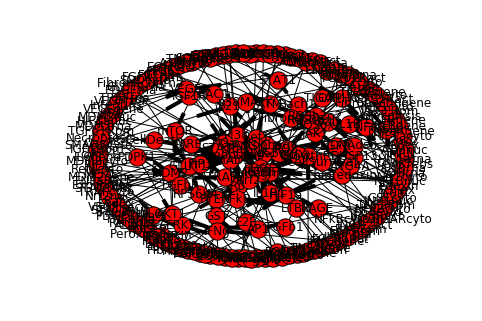

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
nx.draw(G,with_labels=True)
#nx.draw_spectral(G)
plt.savefig("path.png")

## graph with Graphviz

In [13]:
from graphviz import Digraph

In [14]:
dot = Digraph(comment='The CMU pathway graph re-sketched')

In [15]:
for i in range(0,len(ListOfParticipant)):
    dot.node(ListOfParticipant[i])


In [16]:
for i in range(0,len(ListOfEvents)):
    dot.edge(ListOfEvents[i][0],ListOfEvents[i][1])

In [17]:
dot.render('test-output/round-table.gv', view=True)

'test-output/round-table.gv.pdf'